#ENSEMBLE REGRESSION

In [2]:
import pandas as pd
data_dir = "http://dlsun.github.io/pods/data/"
housingdata = pd.read_csv(data_dir + "AmesHousing.txt", sep="\t")

In [3]:
housingdata.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [4]:
#finding the number of rows and columns 
housingdata.shape

(2930, 82)

In [5]:
#segregating our features and class which is to be determined
#considering 5 input features against an output
X_train = housingdata[["Gr Liv Area", "Bedroom AbvGr","Overall Qual","Overall Cond", "Full Bath"]]
y_train = housingdata["SalePrice"]

In [6]:
X_train.shape
#input features have been reduce from 82 to 5

(2930, 5)

#TRAINING OUR DATA USING LINEAR REG AND KNN

In [7]:
#to avoid scaling and build sk learn model its a tediuos process
#just making use of new module called pipeline to make the process faster and to reduce the number of lines in codes
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Train linear regression model
linear_model = LinearRegression()
linear_model.fit(X=X_train, y=y_train)

# Train 150-nearest neighbors model
knn_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=150)
)
knn_model.fit(X=X_train, y=y_train)

# Predict for a 2500 sqft, 3BR/3BA/house/Overall Qual/Overall Cond
new_house = [[2500,3,7,5,3]]
linear_model.predict(new_house), knn_model.predict(new_house)

c:\Users\GowriPrasanthRamsamy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\GowriPrasanthRamsamy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


(array([284134.00196723]), array([275274.36]))

#THERE IS BIG VARIATION BETWEEN OUR LINEAR REG AND KNN MODELS
#LINEAR REG = 284134.00196723
#KNN = 275274.36
#WE CAN USE LOG FUNCTION HERE TO AVOID BIG MSE ERRORS OR SCALING DOWN THE UNITS

In [9]:
#COMBINING BOT LR AND KNN USING VOTING
#FINDING THE MEAN OF BOTH MODELS
import numpy as np
np.mean([
    linear_model.predict(new_house),
    knn_model.predict(new_house)
])

c:\Users\GowriPrasanthRamsamy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\GowriPrasanthRamsamy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


279704.1809836146

In [10]:
#TRIED IMPLEMENTING IT WITH PACKAGE CALLED VOTING REGRESSOR(ESTIMAOR) FROM SCIKIT
from sklearn.ensemble import VotingRegressor

ensemble_model = VotingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)
])
ensemble_model.fit(X=X_train, y=y_train)
ensemble_model.predict(new_house)

c:\Users\GowriPrasanthRamsamy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\GowriPrasanthRamsamy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([279704.18098361])

#VALIDATING EACH MODEL INDIVIDUALLY USING CROSS_VAL_SCORE
#IT SPITS OUT IN NEGAVTIVE BECAUSE IT IS (-NEG MEAN SQUARED)
#CONSIDERING K FOLD VALUE AS 20.

In [12]:
from sklearn.model_selection import cross_val_score

for model in [linear_model, knn_model, ensemble_model]:
    print(-cross_val_score(model, X=X_train, y=y_train, cv=20,
                           scoring="neg_mean_squared_error").mean())

1694495203.6378667
1776517012.6965492
1560548168.4809735


#FROM THE CROSS VALIDATION SCORE OBTAINED 
#ENSEMBLE MODEL IS PERFORMING BETTER THAN LINEAR AND
#LINEAR IS PERFORMING BETTER THAN KNN 1465573998
Stacking
In voting, every model's prediction gets equal weight (or at least a predefined weight, which can be specified using the weights= parameter of VotingRegressor).For example, to learn the weights that should be given to the linear regression and 10-nearest neighbors models above, we first stack the predictions into an array with two columns.



In [14]:
#Stacking
#COMBINATION OF MULTIPLE PREDICTED VALUES FROM MODEL TO GIVE AN MORE CLEAR OUTPUT
preds = np.stack([
    linear_model.predict(X_train), knn_model.predict(X_train)
], axis=1)
preds
#COMBINATION OF LIN AND KNN PRED.VALUES

array([[184360.34700295, 147575.48      ],
       [113291.93865392, 119913.43333333],
       [161444.30415333, 142773.68666667],
       ...,
       [105000.52225645, 125637.21333333],
       [148104.80963933, 126207.81333333],
       [243755.01068265, 228586.85333333]])

In [15]:
#TRAINIG THE PREDICTED VALUES AGAIN IN LR
stacker = LinearRegression()
stacker.fit(X=preds, y=y_train)

LinearRegression()

In [ ]:
# FINDING PERCENT OF CONTRIBUTES FROM LR AND KNN
stacker.coef_

array([0.3959306 , 0.79224514])

In [17]:
from sklearn.ensemble import StackingRegressor

stacking_model = StackingRegressor([
    ("linear", linear_model), 
    ("knn", knn_model)],
    final_estimator=LinearRegression()
)
stacking_model.fit(X=X_train, y=y_train)

stacker = stacking_model.final_estimator_
stacker.intercept_, stacker.coef_

(-31199.118032729806, array([0.46901423, 0.71622118]))

In [18]:
#CROSS VALIDATION SCORE FOR NEW MODEL
-cross_val_score(stacking_model, X=X_train, y=y_train, cv=25,
                 scoring="neg_mean_squared_error").mean()

1465573998.2945654

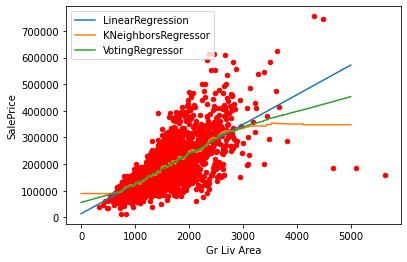

In [27]:
#Plotting the graph for living area and sale price

housingdata.plot.scatter(x="Gr Liv Area", y="SalePrice", color="RED")

X_train = housingdata[["Gr Liv Area"]]
y_train = housingdata["SalePrice"]

for model in [LinearRegression(), 
              KNeighborsRegressor(n_neighbors=100), 
              ensemble_model]:
    model.fit(X=X_train, y=y_train)
    X_test = pd.DataFrame({"Gr Liv Area": np.arange(5000)})
    predictions = pd.Series(
        model.predict(X_test),
        index=X_test["Gr Liv Area"]
    )
    predictions.plot.line(legend=True, label=type(model).__name__)

#VOTING REGRESSOR PERFORMS BETTER THAN KNN AND LR